In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
# %load_ext nb_black
# notebook setup

from pathlib import Path
import sys

sys.path.insert(0, Path().absolute().parent.as_posix())

/Users/ruizhechao/Documents/NNforHJB


/Users/ruizhechao/Documents/NNforHJB/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Experiment: Van der Pol equation

#### Experiment 1

This experiment takes PDPA.py and run the algorithm with the following hyperpapameter

In [2]:
from scr.metric import print_experiment_hyperparameters

print_experiment_hyperparameters("models/experiment_1")

=== models/experiment_1 (5 files) ===
  alpha: 0.001
  gammas: [10.0, 5.0, 1.0, 0.1, 0.01]
  num_insertion: 1
  num_iteration: 40
  power: 2.1
  pruning_threshold: 1e-10


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Best-so-far loss vs best-so-far neurons (avg across runs; single file plots one run)'}, xlabel='Avg best-so-far neuron count', ylabel='Avg best-so-far validation loss'>)

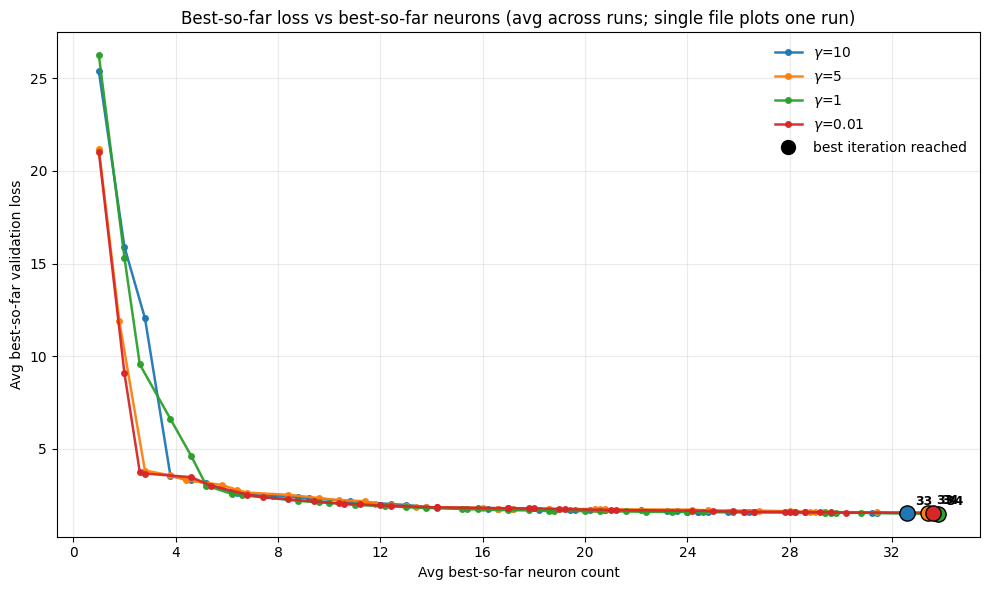

In [3]:
from scr.metric import plot_best_loss_vs_best_neurons_by_gamma

plot_best_loss_vs_best_neurons_by_gamma(
    "models/experiment_1",
    gammas_include=[10.0, 5.0, 1.0, 1e-2],
    loss="train",
)

#### Experiment 2

In [4]:
from scr.metric import print_experiment_hyperparameters

print_experiment_hyperparameters("models/experiment_2")

=== models/experiment_2 (5 files) ===
  alpha: 0.001
  gammas: [10.0, 1.0, 0.1, 0.01, 0.0]
  num_insertion: 50
  num_iteration: 10
  power: 2.1
  pruning_threshold: 1e-10


In [5]:
from scr.metric import summarize_best_iteration_and_loss_by_gamma

out = summarize_best_iteration_and_loss_by_gamma("models/experiment_2", loss="train")
out["table_df"]   # rows = gamma, cols = best_neurons / best_val_loss (sci)

,best_neurons,best_train_loss
gamma=10,372,1.78e+00
gamma=1,455,1.88e+00
gamma=0.1,437,1.79e+00
gamma=0.01,373,1.85e+00
gamma=0,88,3.29e+00


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Best-so-far loss vs best-so-far neurons (avg across runs; single file plots one run)'}, xlabel='Avg best-so-far neuron count', ylabel='Avg best-so-far validation loss'>)

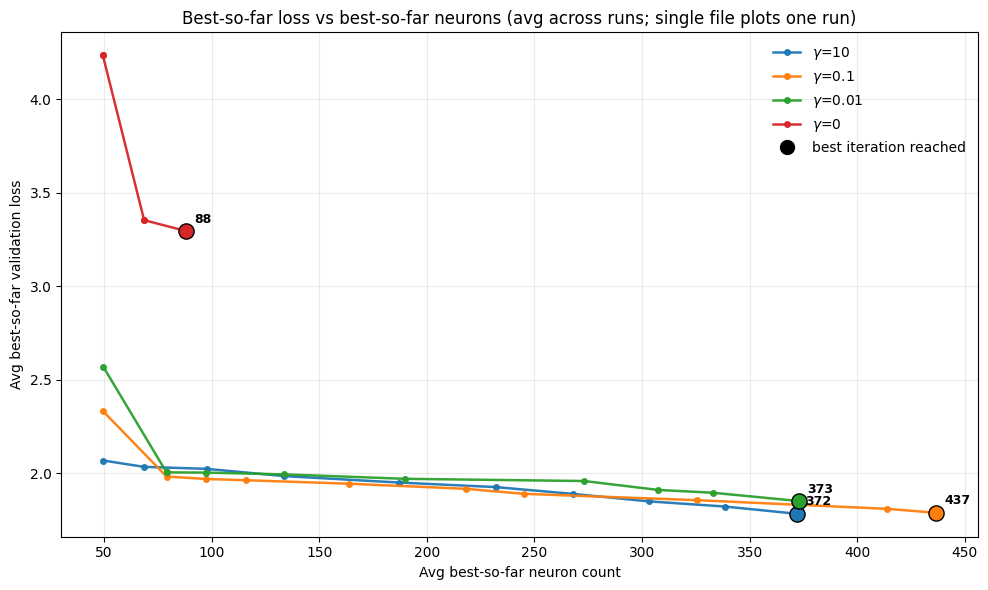

In [6]:
from scr.metric import plot_best_loss_vs_best_neurons_by_gamma

plot_best_loss_vs_best_neurons_by_gamma(
    "models/experiment_2",
    gammas_include=[10.0, 0.1, 1e-2, 0.0],
    loss= "train"
)

In [7]:
# from scr.metric import build_best_val_loss_table_by_gamma

# out_loss = build_best_val_loss_table_by_gamma("models/experiment_1", kind="neuron")
# out_loss["table_df"]

#### Experiment 8

In [8]:
from scr.metric import print_experiment_hyperparameters

print_experiment_hyperparameters("models/experiment_8_v1")

=== models/experiment_8_v1 (5 files) ===
  alpha: 0.001
  gammas: [10.0, 1.0, 0.1, 0.01, 0.0]
  num_insertion: 50
  num_iteration: 10
  power: 2.1
  pruning_threshold: 1e-10


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Best-so-far loss vs best-so-far neurons (avg across runs; single file plots one run)'}, xlabel='Avg best-so-far neuron count', ylabel='Avg best-so-far validation loss'>)

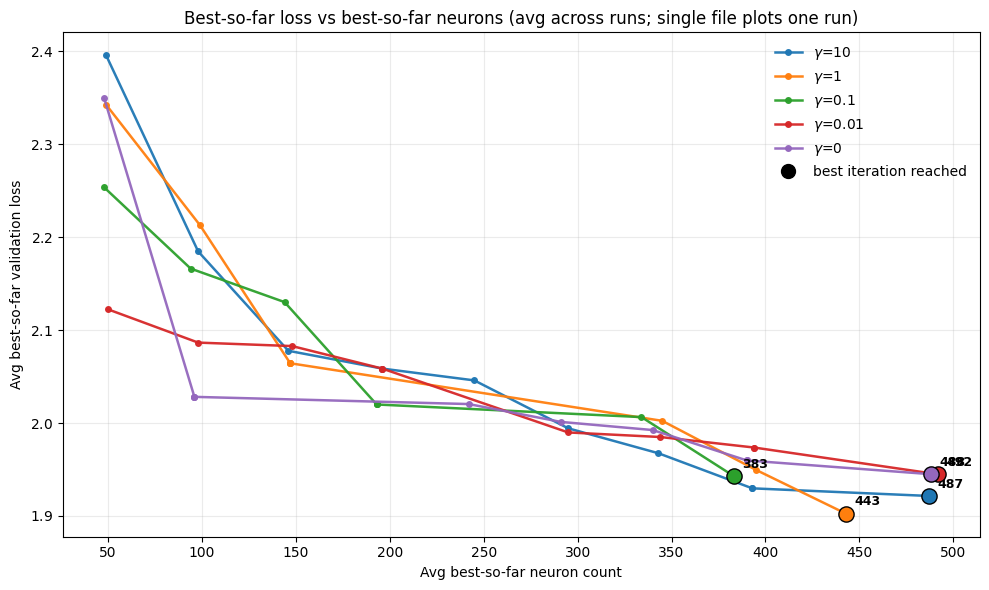

In [39]:
from scr.metric import plot_best_loss_vs_best_neurons_by_gamma

# change the * for differnet number in the path for different experiment:
# pdpa_vdp_model_h1_*.pkl
plot_best_loss_vs_best_neurons_by_gamma(
    "models/experiment_8_v1/pdpa_vdp_model_h1_-1.pkl",
    gammas_include=[10.0, 1.0, 0.1, 1e-2, 0.0],
    loss= "train"
)

### Experiment: gausscos equation (2d)

#### Experiment 3

In [10]:
from scr.metric import print_experiment_hyperparameters

print_experiment_hyperparameters("models/experiment_3")

=== models/experiment_3 (5 files) ===
  alpha: 1e-05
  gammas: [10.0, 1.0, 0.1, 0.01, 0.0]
  num_insertion: 50
  num_iteration: 15
  power: 1.0
  pruning_threshold: 1e-10


In [11]:
from scr.metric import summarize_best_iteration_and_loss_by_gamma

out = summarize_best_iteration_and_loss_by_gamma("models/experiment_3", loss="train")
out["table_df"]   

,best_neurons,best_train_loss
gamma=10,95,4.64e-03
gamma=1,313,1.62e-03
gamma=0.1,270,2.26e-03
gamma=0.01,341,4.27e-03
gamma=0,349,2.02e-02


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Best-so-far loss vs best-so-far neurons (avg across runs; single file plots one run)'}, xlabel='Avg best-so-far neuron count', ylabel='Avg best-so-far validation loss'>)

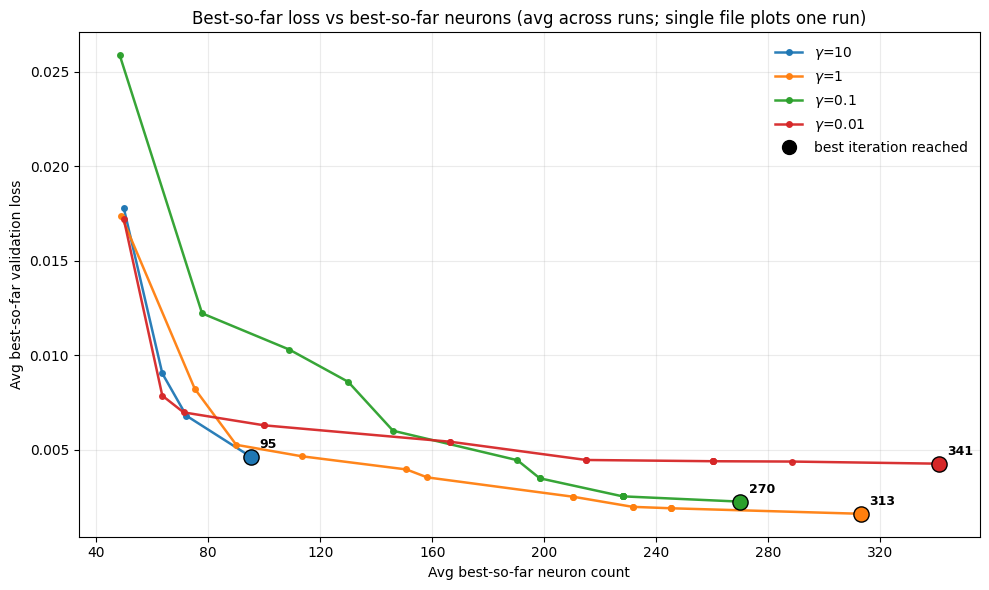

In [12]:
from scr.metric import plot_best_loss_vs_best_neurons_by_gamma

plot_best_loss_vs_best_neurons_by_gamma(
    "models/experiment_3",
    gammas_include=[10.0, 1.0, 1e-1, 1e-2],
    loss="train"
)

# gamma = 0 exibits very large loss

#### Experiment 4

In [13]:
from scr.metric import print_experiment_hyperparameters

print_experiment_hyperparameters("models/experiment_4")

=== models/experiment_4 (5 files) ===
  alpha: 1e-05
  gammas: [10.0, 5.0, 1.0, 0.1, 0.01]
  num_insertion: 50
  num_iteration: 10
  power: 2.1
  pruning_threshold: 1e-10


In [14]:
from scr.metric import summarize_best_iteration_and_loss_by_gamma

out = summarize_best_iteration_and_loss_by_gamma("models/experiment_4", loss="train")
out["table_df"] 

,best_neurons,best_train_loss
gamma=10,306,6.19e-02
gamma=5,301,7.46e-02
gamma=1,346,7.84e-02
gamma=0.1,317,6.84e-02
gamma=0.01,256,6.98e-02


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Best-so-far loss vs best-so-far neurons (avg across runs; single file plots one run)'}, xlabel='Avg best-so-far neuron count', ylabel='Avg best-so-far validation loss'>)

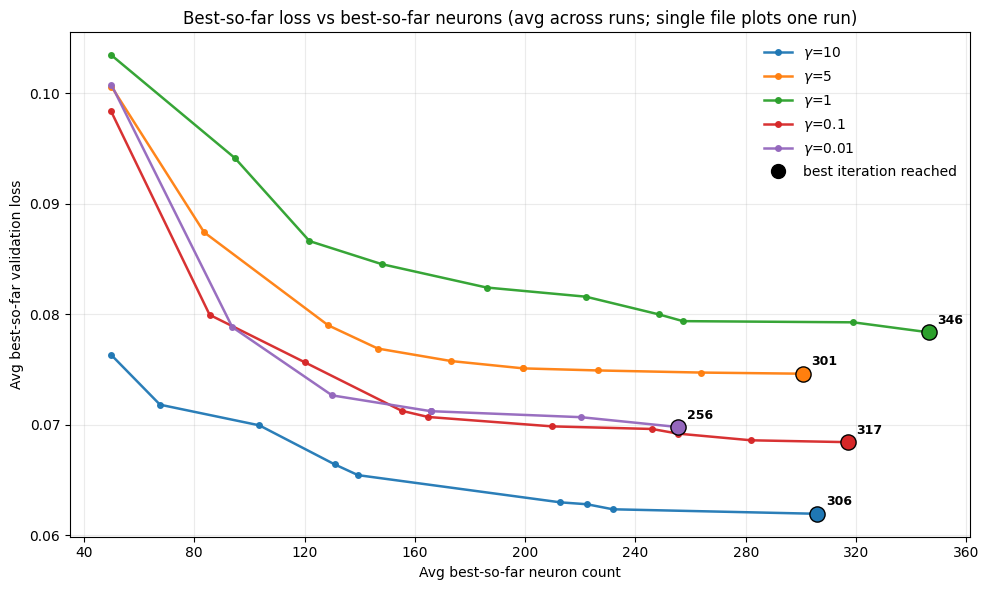

In [15]:
from scr.metric import plot_best_loss_vs_best_neurons_by_gamma

plot_best_loss_vs_best_neurons_by_gamma(
    "models/experiment_4",
    gammas_include=[10.0, 5.0, 1.0, 1e-1, 1e-2],
    loss = "train"
)

#### Experiment 9

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Best-so-far loss vs best-so-far neurons (avg across runs; single file plots one run)'}, xlabel='Avg best-so-far neuron count', ylabel='Avg best-so-far validation loss'>)

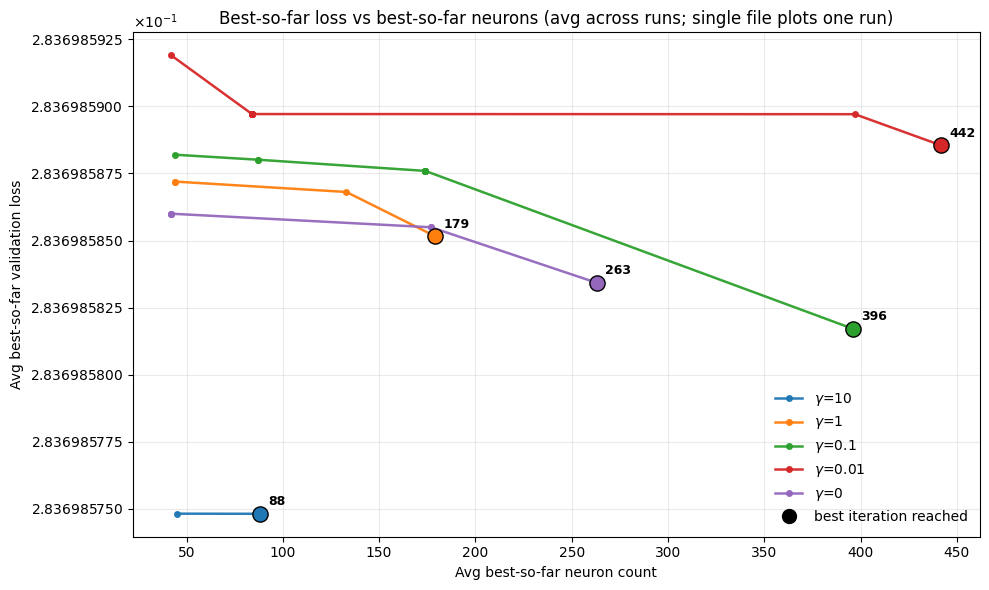

In [44]:
from scr.metric import plot_best_loss_vs_best_neurons_by_gamma

plot_best_loss_vs_best_neurons_by_gamma(
    "models/experiment_9_v1/pdpa_gausscos_model_l2_-3.pkl",
    gammas_include=[10.0, 1.0, 0.1, 1e-2,0.0],
    loss= "train"
)

In [17]:
# from scr.metric import build_best_val_loss_table_by_gamma

# out_loss = build_best_val_loss_table_by_gamma("models/experiment_3", kind="loss")
# out_loss["table_df"]

### Experiment: gausswindow equation (1d)

#### Experiment 5

In [19]:
from scr.metric import print_experiment_hyperparameters

print_experiment_hyperparameters("models/experiment_5")

=== models/experiment_5 (5 files) ===
  alpha: 1e-05
  gammas: [10.0, 5.0, 1.0, 0.1, 0.01]
  num_insertion: 50
  num_iteration: 10
  power: 1.0
  pruning_threshold: 1e-10


In [20]:
from scr.metric import summarize_best_iteration_and_loss_by_gamma

out = summarize_best_iteration_and_loss_by_gamma("models/experiment_5", loss="train")
out["table_df"]   # rows = gamma, cols = best_neurons / best_val_loss (sci)

,best_neurons,best_train_loss
gamma=10,199,1.13e-01
gamma=5,209,1.16e-01
gamma=1,275,1.14e-01
gamma=0.1,158,1.05e-01
gamma=0.01,175,1.01e-01


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Best-so-far loss vs best-so-far neurons (avg across runs; single file plots one run)'}, xlabel='Avg best-so-far neuron count', ylabel='Avg best-so-far validation loss'>)

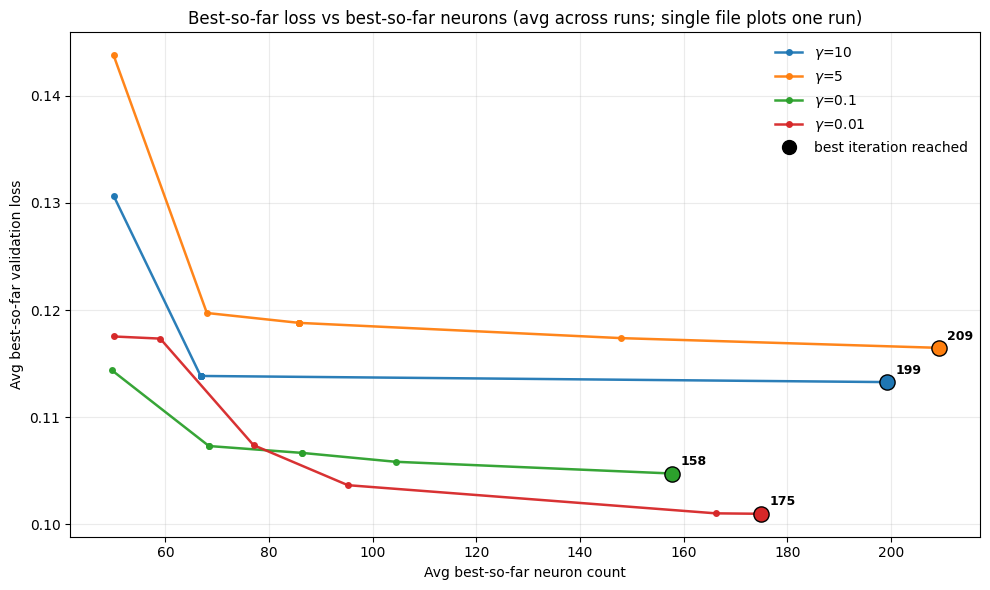

In [21]:
from scr.metric import plot_best_loss_vs_best_neurons_by_gamma

plot_best_loss_vs_best_neurons_by_gamma(
    "models/experiment_5/",
    gammas_include=[10.0, 5, 1e-1, 1e-2],
    loss="train"
)

# gamma = 0 exhibits very large loss. 
# gamma = 5 is werid. 

#### Experiment 10

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Best-so-far loss vs best-so-far neurons (avg across runs; single file plots one run)'}, xlabel='Avg best-so-far neuron count', ylabel='Avg best-so-far validation loss'>)

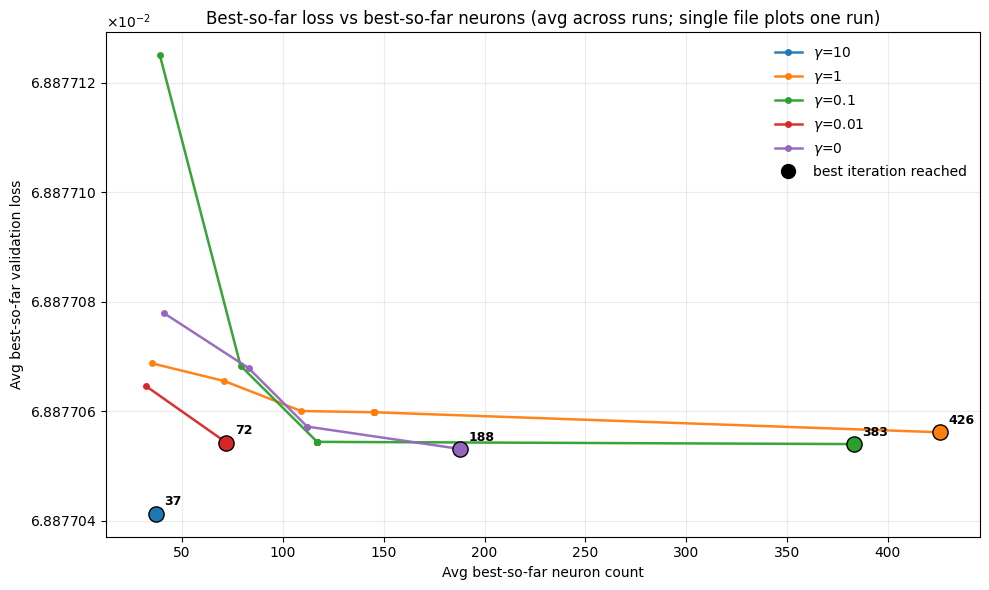

In [46]:
from scr.metric import plot_best_loss_vs_best_neurons_by_gamma

plot_best_loss_vs_best_neurons_by_gamma(
    "models/experiment_10_v1/pdpa_gausswindow_model_l2_-3.pkl",
    gammas_include=[10.0, 1.0, 0.1, 1e-2,0.0],
    loss= "train"
)

In [23]:
# from scr.metric import build_best_val_loss_table_by_gamma

# out = build_best_val_loss_table_by_gamma("models/experiment_4")
# out["table_df"]  

In [24]:
# out_neuron = build_best_val_loss_table_by_gamma("models/experiment_4", kind="neuron")
# out_neuron["table_df"]

assumption: power?
method: test further with 1d example

assumption: dimension?
method: test with Allen-Cahn equation

assumption: local geometry?
method: gausscos with Van der Pol

do it on the training set.
test for the l2 loss for the van der pol. 

